In [6]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
# from iterstrat.ml_stratifiers import iterative_train_test_split

In [8]:
import pandas as pd

# Sample DataFrame
data = pd.read_csv('ol_train.csv')

df = pd.DataFrame(data)

# Split the 'SENTENCE' column into separate labels
labels_df = df['SENTENCE'].str.split(',', expand=True)

# Perform one-hot encoding on the labels
one_hot_encoded = labels_df.apply(lambda x: x.str.split(',').explode(), axis=1)
one_hot_encoded = pd.get_dummies(one_hot_encoded, prefix='', prefix_sep='')

one_hot_encoded = one_hot_encoded.groupby(one_hot_encoded.columns, axis=1).sum()

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)
# Concatenate the new columns with the original DataFrame
# df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'SENTENCE' column and the intermediate columns if needed
df = df.drop('SENTENCE', axis=1)

# Display the resulting DataFrame
# print(df.head)
data =df

In [9]:
# print(data.columns)
for col in data.columns[1:]:
    # print(data[col].shape)
    if len(data[col].unique())>2:
        data[col] = data[col].replace([2], 1)


Mean Squared Error: 0.03052794767244308


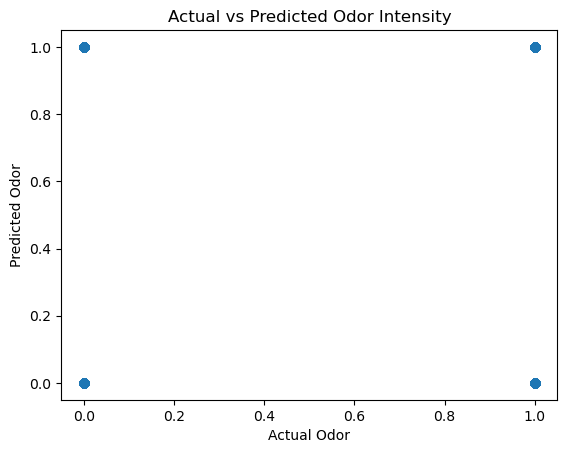

In [10]:
# Load your dataset
# Assuming you have a CSV file with columns 'SMILES' and 'Odor'
# SMILES: Simplified Molecular Input Line Entry System
# Odor: The corresponding odor intensity or any other relevant measure
# graph_list = get_graph_data('ol',odor)
# data = pd.read_csv('ol_train.csv')
# odor = "pungent"
# data = get_graph_data('ol',odor)
# Preprocess the SMILES strings to generate molecular descriptors

#bit based
# def generate_molecular_descriptors(smiles):
#     mol = Chem.MolFromSmiles(smiles)
#     if mol is not None:
#         features = np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 6, nBits=4096))
#         return features
#     else:
#         return [0] * 4096  # Return a vector of zeros if SMILES cannot be converted

def generate_molecular_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 6, nBits=4096)
        bits = [int(fp.GetBit(i)) for i in range(fp.GetNumBits())]
        return bits
    else:
        return [0] * 4096  # Return a vector of zeros if SMILES cannot be converted



data['Molecular_Descriptors'] = data['SMILES'].apply(generate_molecular_descriptors)


# Split the data into training and testing sets

X = np.array(list(data['Molecular_Descriptors']))
data = data.drop('SMILES', axis=1)
data = data.drop('Molecular_Descriptors', axis=1)
# print(data.head())
y = np.array(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the Random Forest model RandomForestClassifier
# rf_model = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=20,metric='jaccard',n_jobs=12))
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=1000,random_state=42,n_jobs=12))

rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Odor')
plt.ylabel('Predicted Odor')
plt.title('Actual vs Predicted Odor Intensity')
plt.show()

In [11]:
type(X_train[0])

numpy.ndarray

In [12]:
y_train.shape

(3452, 109)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,precision_score,roc_auc_score,recall_score,precision_recall_fscore_support

In [14]:
accuracy_score(y_test,y_pred)

0.03587962962962963

In [15]:
precision_score(y_test,y_pred,average='weighted')

C:\Users\Lenovo\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.35896554975045375

In [16]:
f1_score(y_test,y_pred,average='weighted')

C:\Users\Lenovo\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


0.23122349968385883

In [17]:
recall_score(y_test,y_pred,average='weighted')

C:\Users\Lenovo\Desktop\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1751079701609737

In [18]:
roc_scores = []
for i in range(len(y_test[0])):
    try:
        roc_scores.append(roc_auc_score(y_test[:,i], y_pred[:,i]))
    except ValueError:
        roc_scores.append(0)
        continue


In [19]:
np.mean(roc_scores)

0.5547200542985296

In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem

def count_based_morgan_fingerprint(molecule_smiles, radius=6, nbits=4096):
    # Create an RDKit molecule object from SMILES
    mol = Chem.MolFromSmiles(molecule_smiles)
    
    if mol is None:
        return None
    
    # Generate Morgan fingerprint
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nbits)
    
    # Convert the fingerprint to a list of integers (0 or 1)
    bits = [int(fp.GetBit(i)) for i in range(fp.GetNumBits())]
    print(bits)
    # Count the number of set bits
    count = sum(bits)
    
    return count

# Example usage
molecule_smiles = "CCO"  # Ethanol molecule as an example
radius = 2
nbits = 2048
result = count_based_morgan_fingerprint(molecule_smiles, radius, nbits)

print(f"Count-based Morgan fingerprint for {molecule_smiles}: {result}")


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 